In [1]:
import numpy as np
import pandas as pd
!pip install xlrd
df_can = pd.read_excel('./Canada.xlsx', sheet_name="Canada by Citizenship", skiprows=range(20),skipfooter=2)

In [2]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)

In [3]:
years = list(map(str, range(1980, 2014)))

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [5]:
#pie chart

In [6]:
df_continents = df_can.groupby('Continent', axis=0).sum()
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


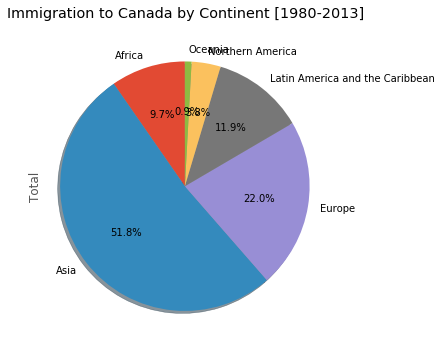

In [7]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True)
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal')
plt.show()

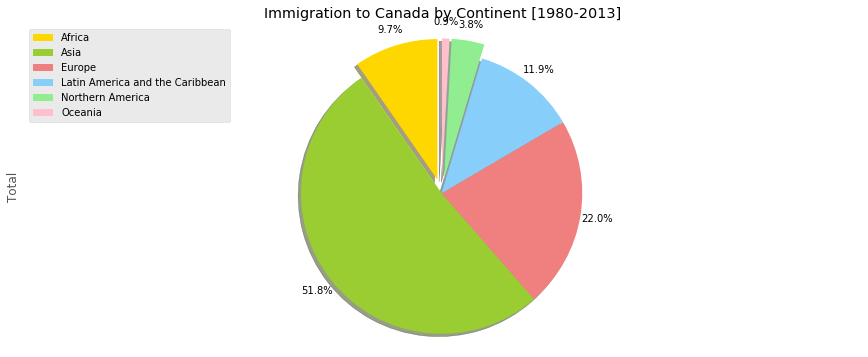

In [8]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents['Total'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=color_list,
                           explode=explode_list)
plt.title('Immigration to Canada by Continent [1980-2013]')
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

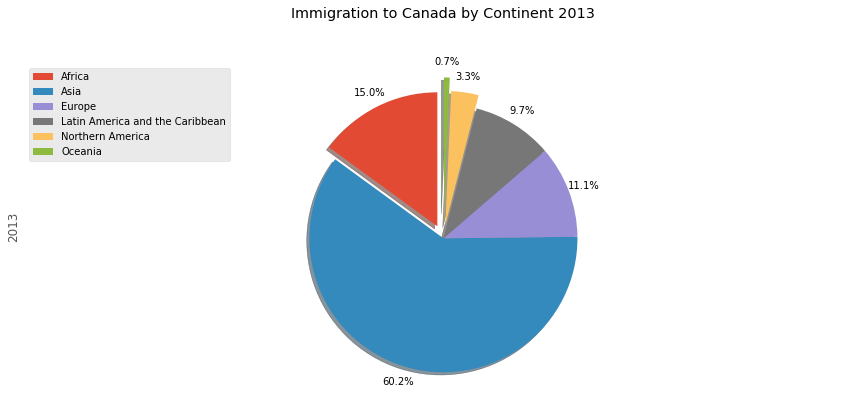

In [10]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_continents['2013'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           explode=explode_list)
plt.title('Immigration to Canada by Continent 2013', y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

In [12]:
#box plot
df_japan = df_can.loc[['Japan'],years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


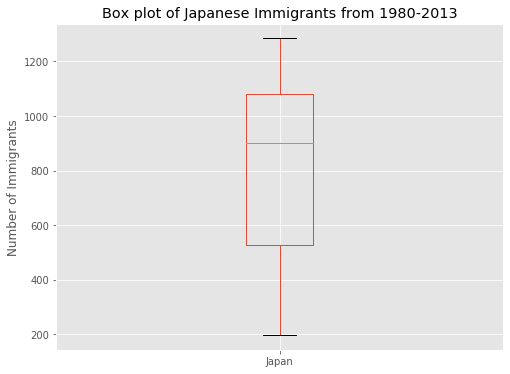

In [13]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [14]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [15]:
df_CI = df_can.loc[['India', 'China'], years].transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


In [16]:
df_CI.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


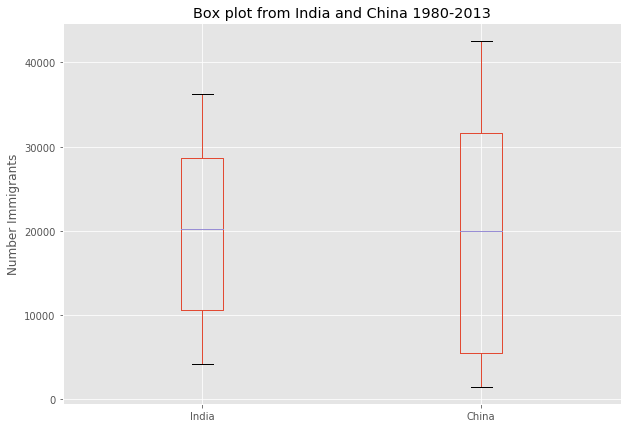

In [18]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plot from India and China 1980-2013')
plt.ylabel('Number Immigrants')

plt.show()

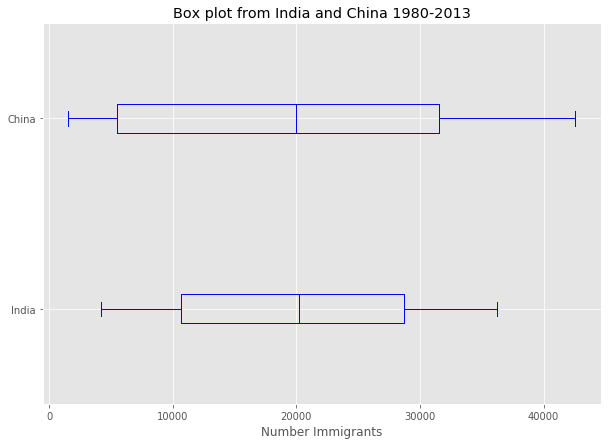

In [19]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plot from India and China 1980-2013')
plt.xlabel('Number Immigrants')

plt.show()

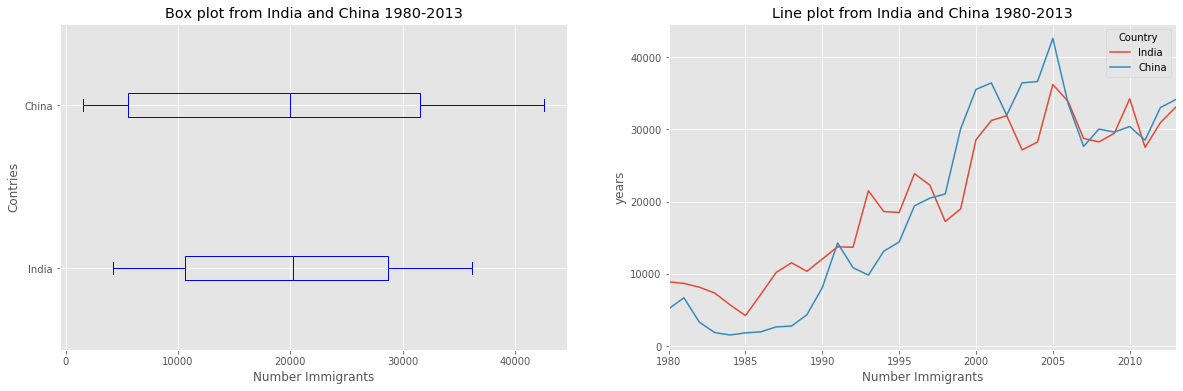

In [20]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_CI.plot(kind='box', figsize=(20, 6), color='blue', vert=False, ax=ax0)
ax0.set_title('Box plot from India and China 1980-2013')
ax0.set_xlabel('Number Immigrants')
ax0.set_ylabel('Contries')

df_CI.plot(kind='line',figsize=(20,6),ax=ax1)
ax1.set_title('Line plot from India and China 1980-2013')
ax1.set_xlabel('Number Immigrants')
ax1.set_ylabel('years')

plt.show()


In [21]:
df_top15 = df_can.sort_values(['Total'],ascending=False,axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [22]:
years_80s=list(map(str, range(1980,1990)))
years_90s=list(map(str, range(1990,2000)))
years_00s=list(map(str, range(2000,2010)))

In [23]:
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_80s

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
United States of America                                 76824
Iran (Islamic Republic of)                               21477
Sri Lanka                                                14796
Republic of Korea                                        16259
Poland                                                   57602
Lebanon                                                  24918
France                                                   17137
Jamaica                                                  34328
Viet Nam                                                 30638
Romania                                                   7613
dtype: int64

In [24]:
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

In [25]:
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})

In [26]:
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [27]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


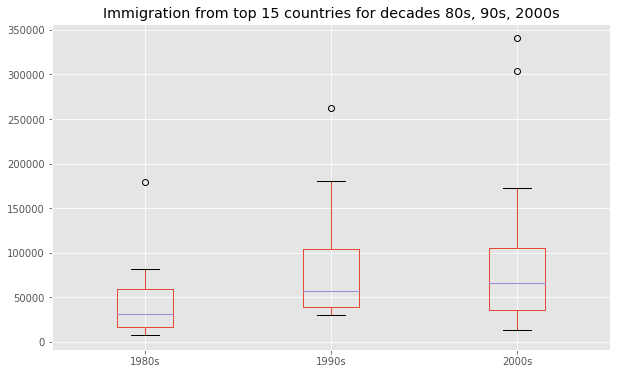

In [28]:
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s, 2000s')

plt.show()

In [29]:
#scatter plot
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [30]:
df_tot.reset_index(inplace=True)
df_tot

,index,0
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


In [33]:
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


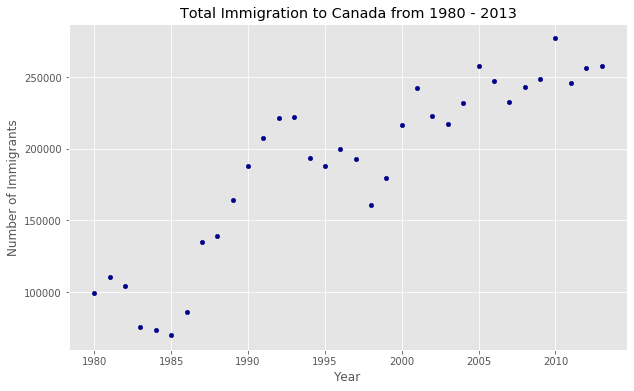

In [34]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [35]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

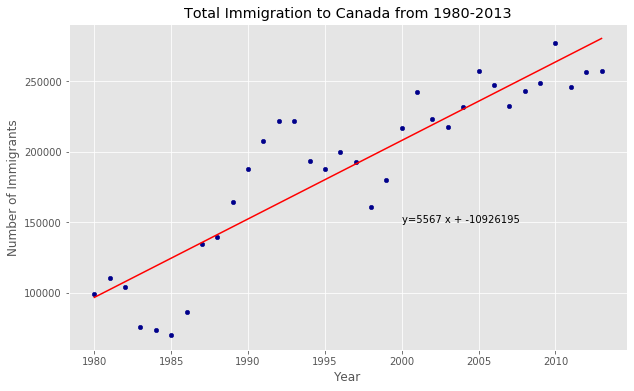

In [37]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10, 6),color='darkblue')
plt.title('Total Immigration to Canada from 1980-2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0]*x+fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

In [38]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'], years].transpose()
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']

In [39]:
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [40]:
df_total['year'] = df_total['year'].astype(int)

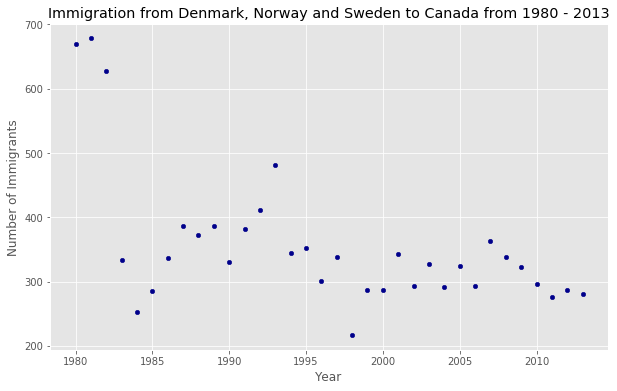

In [41]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Immigration from Denmark, Norway and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [42]:
#bubble plot
df_can_t = df_can[years].transpose()
df_can_t.index =map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [43]:
norm_brazil=(df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

norm_argentina=(df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

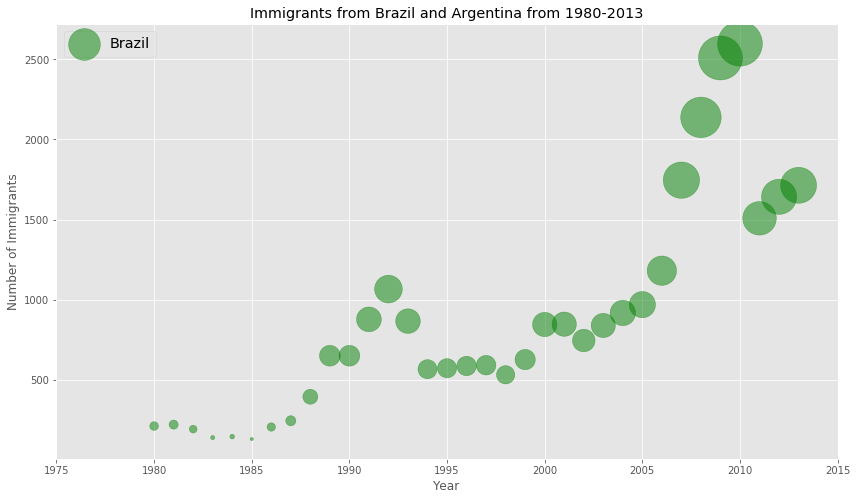

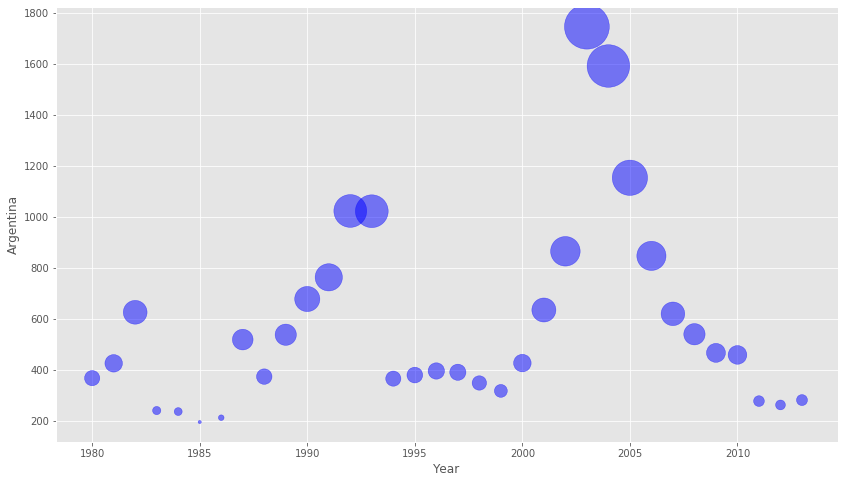

In [45]:
ax0 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Brazil',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='green',
                   s=norm_brazil*2000+10,
                   xlim=(1975,2015)
                   )

ax1 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='Argentina',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='blue',
                   s=norm_argentina*2000+10,
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigrants from Brazil and Argentina from 1980-2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

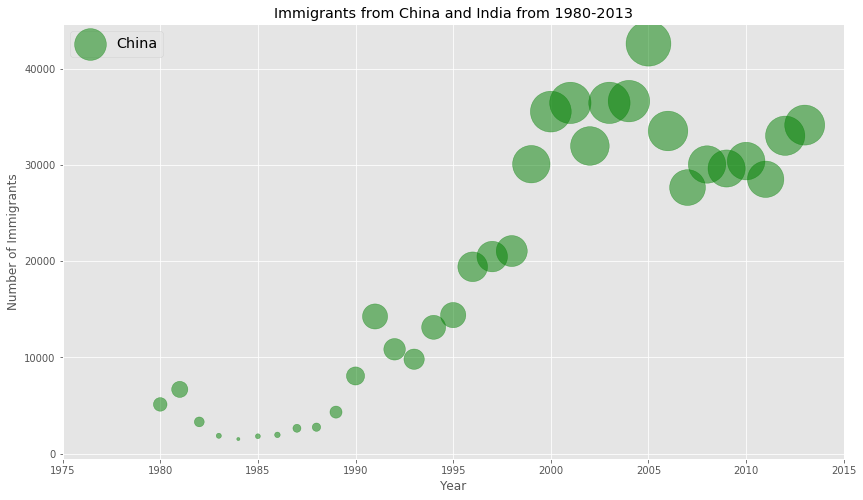

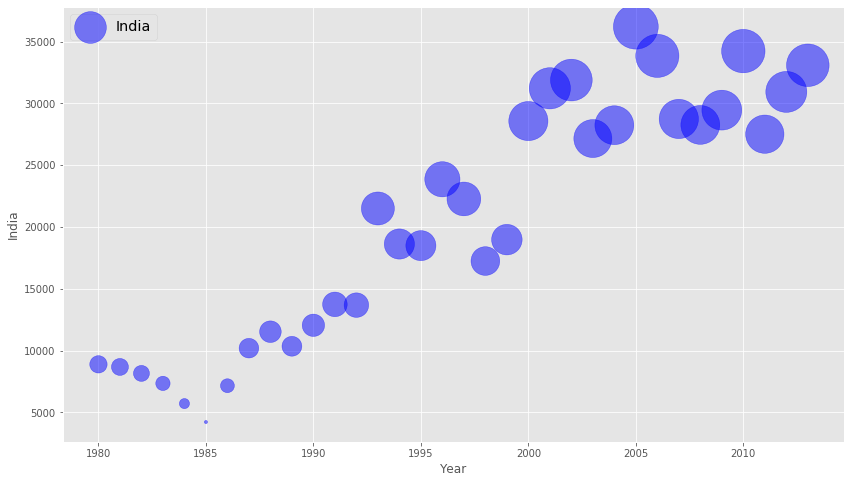

In [48]:
norm_china=(df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_india=(df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

ax0 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='China',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='green',
                   s=norm_china*2000+10,
                   xlim=(1975,2015)
                   )

ax1 = df_can_t.plot(kind='scatter',
                   x='Year',
                   y='India',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='blue',
                   s=norm_india*2000+10,
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigrants from China and India from 1980-2013')
ax0.legend(['China'], loc='upper left', fontsize='x-large')
ax1.legend(['India'], loc='upper left', fontsize='x-large')

